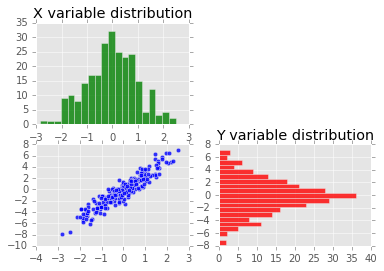

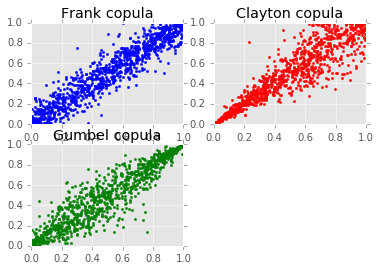

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copulalib.copulalib import Copula
plt.style.use('ggplot')

def generateData():
    global x,y
    x = np.random.normal(size=250)
    y = 2.5*x + np.random.normal(size=250)

# Data and histograms
def plotData():
    global x,y
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()

def generateCopulas():
    global x,y
    fig = plt.figure()

    frank = Copula(x,y,family='frank')
    uf,vf = frank.generate_uv(1000)
    fig.add_subplot(2,2,1)
    plt.scatter(uf,vf,marker='.',color='blue')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Frank copula')

    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')

    gumbel = Copula(x,y,family='gumbel')
    ug,vg = gumbel.generate_uv(1000)
    fig.add_subplot(2,2,3)
    plt.scatter(ug,vg,marker='.',color='green')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Gumbel copula')

    plt.show()

#-------------------------------------------------------------------------------
# Run the functions

generateData()
plotData()
generateCopulas()

In [10]:
from scipy import stats
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Spacer#,BoxSelectTool, LassoSelectTool
from bokeh.layouts import row, column
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

In [11]:
# create three normal population samples with different parameters
x1 = np.random.normal(loc=5.0, size=400) * 100
y1 = np.random.normal(loc=10.0, size=400) * 10

x2 = np.random.normal(loc=5.0, size=800) * 50
y2 = np.random.normal(loc=5.0, size=800) * 10

x3 = np.random.normal(loc=55.0, size=200) * 10
y3 = np.random.normal(loc=4.0, size=200) * 10

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))


In [18]:
from bokeh.models.glyphs import Circle

In [23]:
kernel = stats.gaussian_kde(x,0.01)
xr = kernel(x)

kernel = stats.gaussian_kde(y,0.01)
yr = kernel(y)

source = ColumnDataSource(data=dict(x=x, y=y,xr=xr,yr=yr))

TOOLS="wheel_zoom,box_select,lasso_select,reset"

# create the scatter plot
p = figure(tools=TOOLS, plot_width=550, plot_height=550, min_border=10, min_border_left=0,
           toolbar_location="above", x_axis_location=None, y_axis_location=None)
p.background_fill_color = "#fafafa"

renderer = p.scatter('x', 'y', source=source,size=3,  alpha=0.6)
renderer.selection_glyph =  Circle(fill_color='firebrick', line_color=None)
renderer.nonselection_glyph = Circle(fill_color='#1f77b4', fill_alpha=0.5, line_color=None)

#show(p)
p.toolbar.logo = None

ph = figure(tools='box_select',toolbar_location=None, plot_width=p.plot_width, plot_height=200,
           min_border=10, min_border_left=0, y_axis_location="right")
ph.xgrid.grid_line_color = None
ph.yaxis.major_label_orientation = np.pi/4
ph.background_fill_color = "#fafafa"
renderer = ph.scatter('x', 'xr', source=source,size=3,  alpha=0.6)
renderer.selection_glyph =  Circle(fill_color='firebrick', line_color=None)
renderer.nonselection_glyph = Circle(fill_color='#1f77b4', fill_alpha=0.5, line_color=None)


pv = figure(tools='box_select',toolbar_location=None, plot_width=200, plot_height=p.plot_height,
            min_border=10, y_axis_location="right")
pv.ygrid.grid_line_color = None
pv.xaxis.major_label_orientation = np.pi/4
pv.background_fill_color = "#fafafa"

renderer = pv.scatter('yr','y', source=source,size=3,  alpha=0.6)
renderer.selection_glyph =  Circle(fill_color='firebrick', line_color=None)
renderer.nonselection_glyph = Circle(fill_color='#1f77b4', fill_alpha=0.5, line_color=None)


layout = column(row(p, pv), row(ph, Spacer(width=200, height=200)))
show(layout)

In [24]:
show(layout)

In [25]:
show(layout)

In [26]:
show(layout)

In [27]:
show(layout)

In [ ]:
# create the horizontal histogram

#hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

ph = figure(toolbar_location=None, plot_width=p.plot_width, plot_height=200, x_range=p.x_range,
            y_range=(-hmax, hmax), min_border=10, min_border_left=50, y_axis_location="right")
ph.xgrid.grid_line_color = None
ph.yaxis.major_label_orientation = np.pi/4
ph.background_fill_color = "#fafafa"

ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
#hh1 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
#hh2 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)
show(ph)

In [ ]:
ph = figure(toolbar_location=None, plot_width=p.plot_width, plot_height=200, x_range=p.x_range,
            y_range=(-hmax, hmax), min_border=10, min_border_left=50, y_axis_location="right")
ph.xgrid.grid_line_color = None
ph.yaxis.major_label_orientation = np.pi/4
ph.background_fill_color = "#fafafa"

ph.hbar('hedges', 'y', source=source)

show(ph)

In [ ]:
ph.hbar?

In [ ]:
from bokeh.charts import Histogram
from bokeh.sampledata.iris import flowers as data

hist = Histogram(data, values="petal_length", color="species", legend="top_right", bins=12)

show(hist)

In [4]:
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

x = list(range(-20, 21))
y0 = [abs(xx) for xx in x]
y1 = [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300, title=None)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300, title=None)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [ ]:
# Plot a complex chart in a single line

from bokeh.charts import Histogram
from bokeh.sampledata.iris import flowers as data

hist = Histogram(data, values="petal_length", color="species", legend="top_right", bins=12)

show(hist)

In [ ]:
grid = gridplot([[p,pv,ph]])
show(grid)

In [ ]:
import numpy as np

from bokeh.layouts import row, column
from bokeh.models import BoxSelectTool, LassoSelectTool, Spacer
from bokeh.plotting import figure, curdoc

# create three normal population samples with different parameters
x1 = np.random.normal(loc=5.0, size=400) * 100
y1 = np.random.normal(loc=10.0, size=400) * 10

x2 = np.random.normal(loc=5.0, size=800) * 50
y2 = np.random.normal(loc=5.0, size=800) * 10

x3 = np.random.normal(loc=55.0, size=200) * 10
y3 = np.random.normal(loc=4.0, size=200) * 10

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

TOOLS="pan,wheel_zoom,box_select,lasso_select,reset"

# create the scatter plot
p = figure(tools=TOOLS, plot_width=600, plot_height=600, min_border=10, min_border_left=50,
           toolbar_location="above", x_axis_location=None, y_axis_location=None,
           title="Linked Histograms")
p.background_fill_color = "#fafafa"
p.select(BoxSelectTool).select_every_mousemove = False
p.select(LassoSelectTool).select_every_mousemove = False

r = p.scatter(x, y, size=3, color="#3A5785", alpha=0.6)

# create the horizontal histogram
hhist, hedges = np.histogram(x, bins=20)
hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

ph = figure(toolbar_location=None, plot_width=p.plot_width, plot_height=200, x_range=p.x_range,
            y_range=(-hmax, hmax), min_border=10, min_border_left=50, y_axis_location="right")
ph.xgrid.grid_line_color = None
ph.yaxis.major_label_orientation = np.pi/4
ph.background_fill_color = "#fafafa"

ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
hh1 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
hh2 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)

# create the vertical histogram
vhist, vedges = np.histogram(y, bins=20)
vzeros = np.zeros(len(vedges)-1)
vmax = max(vhist)*1.1

pv = figure(toolbar_location=None, plot_width=200, plot_height=p.plot_height, x_range=(-vmax, vmax),
            y_range=p.y_range, min_border=10, y_axis_location="right")
pv.ygrid.grid_line_color = None
pv.xaxis.major_label_orientation = np.pi/4
pv.background_fill_color = "#fafafa"

pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vhist, color="white", line_color="#3A5785")
vh1 = pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vzeros, alpha=0.5, **LINE_ARGS)
vh2 = pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vzeros, alpha=0.1, **LINE_ARGS)


In [ ]:
import numpy as np
from bokeh.io import push_notebook

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5, 5))
p.line(x, y, color="#2222aa", alpha=0.5, line_width=2, source=source, name="foo")

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source.data['y'] = A * func(w * x + phi)
    push_notebook()
    
show(p, notebook_handle=True)

In [ ]:
from ipywidgets import interact
interact(update, f=["sin", "cos", "tan"], w=(0,10, 0.1), A=(0,5, 0.1), phi=(0, 10, 0.1))

In [ ]:
from bokeh.models.tools import HoverTool
from bokeh.sampledata.glucose import data

subset = data.ix['2010-10-06']

x, y = subset.index.to_series(), subset['glucose']

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", tools="",
              toolbar_location=None, title='Hover over points')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(p)

In [ ]:
def update(attr, old, inds):
    #inds = np.array(new['1d']['indices'])
    if len(inds) == 0 or len(inds) == len(x):
        hhist1, hhist2 = hzeros, hzeros
        vhist1, vhist2 = vzeros, vzeros
    else:
        
        neg_inds = np.ones_like(x, dtype=np.bool)
        neg_inds[inds] = False
        hhist1, _ = np.histogram(x[inds], bins=hedges)
        vhist1, _ = np.histogram(y[inds], bins=vedges)
        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)
        vhist2, _ = np.histogram(y[neg_inds], bins=vedges)

    hh1.data_source.data["top"]   =  hhist1
    hh2.data_source.data["top"]   = -hhist2
    vh1.data_source.data["right"] =  vhist1
    vh2.data_source.data["right"] = -vhist2
    print('hola')
r.data_source.on_change('selected', update)

In [ ]:
show(layout)

In [ ]:
''' Create a simple stocks correlation dashboard.
Choose stocks to compare in the drop down widgets, and make selections
on the plots to update the summary and histograms accordingly.
.. note::
    Running this example requires downloading sample data. See
    the included `README`_ for more information.
Use the ``bokeh serve`` command to run the example by executing:
    bokeh serve stocks
at your command prompt. Then navigate to the URL
    http://localhost:5006/stocks
.. _README: https://github.com/bokeh/bokeh/blob/master/examples/app/stocks/README.md
'''
try:
    from functools import lru_cache
except ImportError:
    # Python 2 does stdlib does not have lru_cache so let's just
    # create a dummy decorator to avoid crashing
    print ("WARNING: Cache for this example is available on Python 3 only.")
    def lru_cache():
        def dec(f):
            def _(*args, **kws):
                return f(*args, **kws)
            return _
        return dec

from os.path import dirname, join

import pandas as pd

from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import PreText, Select
from bokeh.plotting import figure

DATA_DIR = join(dirname(__file__), 'daily')

DEFAULT_TICKERS = ['AAPL', 'GOOG', 'INTC', 'BRCM', 'YHOO']

def nix(val, lst):
    return [x for x in lst if x != val]

@lru_cache()
def load_ticker(ticker):
    fname = join(DATA_DIR, 'table_%s.csv' % ticker.lower())
    data = pd.read_csv(fname, header=None, parse_dates=['date'],
                       names=['date', 'foo', 'o', 'h', 'l', 'c', 'v'])
    data = data.set_index('date')
    return pd.DataFrame({ticker: data.c, ticker+'_returns': data.c.diff()})

@lru_cache()
def get_data(t1, t2):
    df1 = load_ticker(t1)
    df2 = load_ticker(t2)
    data = pd.concat([df1, df2], axis=1)
    data = data.dropna()
    data['t1'] = data[t1]
    data['t2'] = data[t2]
    data['t1_returns'] = data[t1+'_returns']
    data['t2_returns'] = data[t2+'_returns']
    return data

# set up widgets

stats = PreText(text='', width=500)
ticker1 = Select(value='AAPL', options=nix('GOOG', DEFAULT_TICKERS))
ticker2 = Select(value='GOOG', options=nix('AAPL', DEFAULT_TICKERS))

# set up plots

source = ColumnDataSource(data=dict(date=[], t1=[], t2=[], t1_returns=[], t2_returns=[]))
source_static = ColumnDataSource(data=dict(date=[], t1=[], t2=[], t1_returns=[], t2_returns=[]))
tools = 'pan,wheel_zoom,xbox_select,reset'

corr = figure(plot_width=350, plot_height=350,
              tools='pan,wheel_zoom,box_select,reset')
corr.circle('t1_returns', 't2_returns', size=2, source=source,
            selection_color="orange", alpha=0.6, nonselection_alpha=0.1, selection_alpha=0.4)

ts1 = figure(plot_width=900, plot_height=200, tools=tools, x_axis_type='datetime', active_drag="xbox_select")
ts1.line('date', 't1', source=source_static)
ts1.circle('date', 't1', size=1, source=source, color=None, selection_color="orange")

ts2 = figure(plot_width=900, plot_height=200, tools=tools, x_axis_type='datetime', active_drag="xbox_select")
ts2.x_range = ts1.x_range
ts2.line('date', 't2', source=source_static)
ts2.circle('date', 't2', size=1, source=source, color=None, selection_color="orange")

# set up callbacks

def ticker1_change(attrname, old, new):
    ticker2.options = nix(new, DEFAULT_TICKERS)
    update()

def ticker2_change(attrname, old, new):
    ticker1.options = nix(new, DEFAULT_TICKERS)
    update()

def update(selected=None):
    t1, t2 = ticker1.value, ticker2.value

    data = get_data(t1, t2)
    source.data = source.from_df(data[['t1', 't2', 't1_returns', 't2_returns']])
    source_static.data = source.data

    update_stats(data, t1, t2)

    corr.title.text = '%s returns vs. %s returns' % (t1, t2)
    ts1.title.text, ts2.title.text = t1, t2

def update_stats(data, t1, t2):
    stats.text = str(data[[t1, t2, t1+'_returns', t2+'_returns']].describe())

ticker1.on_change('value', ticker1_change)
ticker2.on_change('value', ticker2_change)

def selection_change(attrname, old, new):
    t1, t2 = ticker1.value, ticker2.value
    data = get_data(t1, t2)
    selected = source.selected['1d']['indices']
    if selected:
        data = data.iloc[selected, :]
    update_stats(data, t1, t2)

source.on_change('selected', selection_change)

# set up layout
widgets = column(ticker1, ticker2, stats)
main_row = row(corr, widgets)
series = column(ts1, ts2)
layout = column(main_row, series)

# initialize
update()

curdoc().add_root(layout)
curdoc().title = "Stocks"